# Feed Forward Network
a. Import the necessary packages 
b. Load the training and testing data (MNIST/CIFAR10) 
c. Define the network architecture using Keras 
d. Train the model using SGD 
e. Evaluate the network 
f. Plot the training loss and accuracy

In [1]:
# Load necessary Packages

In [31]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [7]:
# Define training and testing dataset

In [8]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
# Build Model

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


C:\Users\Pritak\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Model Compile

In [39]:
model.compile(optimizer="sgd", #adjusting weights
              loss="sparse_categorical_crossentropy", 
              metrics = ["accuracy"]) # measuring the accuracy of the model

In [20]:
# Train model

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7257 - loss: 1.0378 - val_accuracy: 0.9002 - val_loss: 0.3637
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.3586 - val_accuracy: 0.9179 - val_loss: 0.2957
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9168 - loss: 0.2999 - val_accuracy: 0.9270 - val_loss: 0.2639
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9248 - loss: 0.2665 - val_accuracy: 0.9320 - val_loss: 0.2409
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9323 - loss: 0.2429 - val_accuracy: 0.9363 - val_loss: 0.2211
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9400 - loss: 0.2175 - val_accuracy: 0.9405 - val_loss: 0.2043
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9422 - loss: 0.2059 - val_accuracy: 0.9444 - val_loss: 0.1915
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9479 - loss: 0.1876 - 

In [24]:
# Evaluate Model

In [37]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9442 - loss: 0.1877
Loss=0.162
Accuracy=0.952


In [28]:
prediction=model.predict(x_test)
print("The predicted number is= %d" %np.argmax(prediction[3999]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The predicted number is= 9


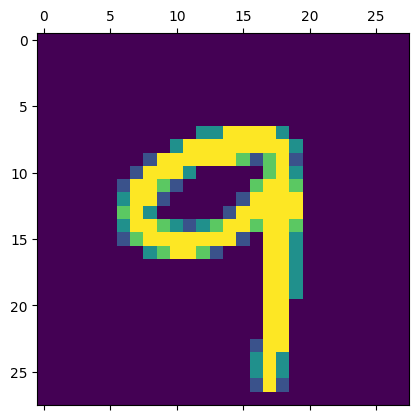

In [32]:
plt.matshow(x_test[3999])

In [33]:
# Performance Evaluation

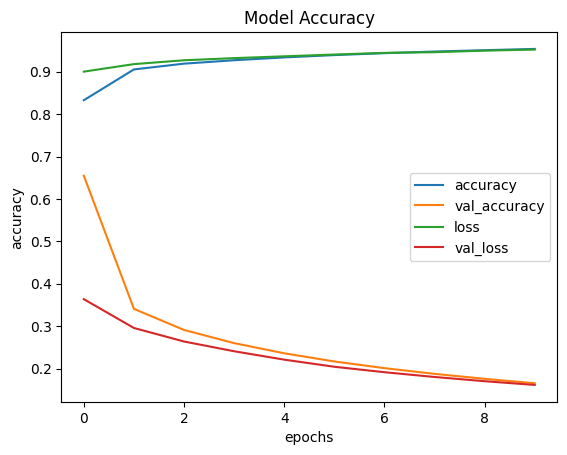

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title("Model Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy','loss', 'val_loss'])
plt.show()

In [40]:
import seaborn as sns

<Axes: >

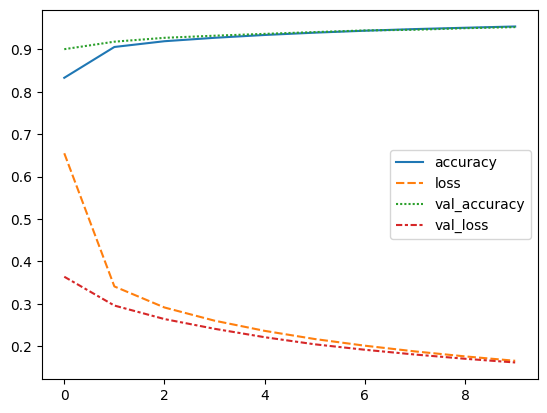

In [42]:
sns.lineplot(history.history)